[[304 180]
 [343 174]
 [221   8]
 [ 53 122]
 [283 278]
 [396 410]
 [293 257]
 [187 213]
 [322 162]
 [278 382]]
[[299 185]
 [346 189]
 [170  53]
 [ 67 117]
 [266 288]
 [416 393]
 [286 245]
 [203 230]
 [317 159]
 [258 382]]
[[301 189]
 [339 197]
 [170  54]
 [ 67 117]
 [266 294]
 [419 390]
 [284 246]
 [208 233]
 [306 156]
 [256 388]]
[[303 191]
 [338 198]
 [170  54]
 [ 67 117]
 [267 299]
 [420 388]
 [281 248]
 [209 235]
 [302 154]
 [256 391]]
[[304 191]
 [335 192]
 [170  54]
 [ 67 117]
 [268 302]
 [421 387]
 [280 249]
 [210 237]
 [300 154]
 [256 393]]
[[303 191]
 [333 191]
 [170  54]
 [ 67 117]
 [268 304]
 [421 387]
 [280 249]
 [210 238]
 [299 153]
 [257 394]]
[[302 191]
 [332 191]
 [170  54]
 [ 67 117]
 [268 305]
 [421 387]
 [280 253]
 [210 239]
 [298 152]
 [257 395]]
[[300 191]
 [332 190]
 [170  54]
 [ 67 117]
 [267 306]
 [421 387]
 [280 253]
 [210 239]
 [298 152]
 [257 395]]
[[299 192]
 [331 190]
 [170  54]
 [ 67 117]
 [267 307]
 [421 387]
 [281 255]
 [210 239]
 [298 152]
 [257 396]]
[

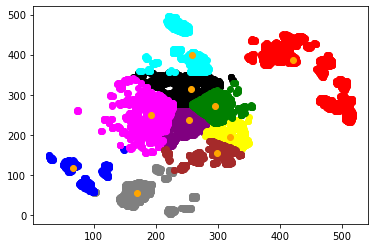

(array([[253, 237],
        [319, 193],
        [170,  54],
        [ 67, 117],
        [257, 314],
        [421, 387],
        [295, 271],
        [192, 249],
        [298, 155],
        [258, 399]]),
 array([3, 3, 3, ..., 5, 5, 5], dtype=int64))

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances as pdist

#definig k-mediods function  
def cluster (data_points,k):
    if k < 1:
        return None, None

#selecting k random centroids
    np.random.seed(0)
    previous_seeds = data_points[np.random.choice (len(data_points), k, replace=False)] 
    current_seeds = []
    labels = []

#performing k-medoids algorithm
    while True:
        labels = np.array([np.argmin(np.sqrt(np.sum((previous_seeds - data_points[i])**2, axis=1))) for i in range(len(data_points))])
        print(previous_seeds)
        current_seeds = np.array([compute_medoid(j, labels, data_points) for j in range(k)])
        if np.all(previous_seeds == current_seeds):
            plotpoints(data_points,labels,previous_seeds,k)
            plt.show()
            break;
        previous_seeds = current_seeds

    return current_seeds, labels

#computing medoids and assingning points to the cluster
def compute_medoid(which_cluster, labels, data_points):
    index = np.argmin(np.sum(pdist(data_points[labels == which_cluster], metric='euclidean'), axis=1))                      
    points = data_points[labels == which_cluster]
    return points[index]

import wradlib as wrl
import matplotlib.pyplot as plt
import pandas as pd

#fetching and reading data file from the system
file_path = 'C:/Users/HP/Desktop/IMD Data/BHP190610110229.MAXSU60'
fcontent = wrl.io.read_iris(file_path)

#reading data for a particular elevation and storing it in 'a'
a = fcontent['data'][0][0]
a.shape
#reshaping to convert 3D data into 2D data
a=a.reshape(720,720)

#slicing data to eliminate undesired data points
new_a = a[200:,:520]
for i in range(0,520):
    for j in range(0,520):
        if new_a[i][j] == 95.5:
            new_a[i][j] = -32.
            
points = []
#k is number of clusters which is equal to 10
k=10

#append all the points except 95.5 and -32 in 'points' list
for indx,x in enumerate(new_a):
    for indy,y in enumerate(x):
        if y!=95.5 and y!=-32 :
            points.append(list([indx,indy]))

#defining a function to plot points on the graph            
def plotpoints(data_points,labels,previous_seeds,k):
    color = ['purple','yellow','grey','blue','black','red','green','magenta', 'brown', 'aqua']
    
    for i in range(k):
        x = new_a[labels==i][:,0]
        y = new_a[labels==i][:,1]
        plt.scatter(x,y,c=color[i])
  
    for i in previous_seeds:
        plt.scatter(i[0],i[1],c='orange')

#converting list into an array        
new_a = np.array(points)

#calling k-medoids function
cluster(new_a,10)